# Baselines

Características:
* Rango de n-gramas: 3
* Frecuencia mínima de aparición: 3
* Conjunto de datos sin preprocesamiento

## Imports

In [1]:
import sys
sys.path.append('../../../Scripts/')

In [2]:
import pandas as pd, numpy as np
import baseline_model as b
import plots as p
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV

## Paths

In [4]:
main_path = '../Datasets/CSV/'

In [5]:
# English
data_training_en_path = f'{main_path}pan19-author-profiling-training-2019-02-18-en.csv'
data_test_en_path = f'{main_path}pan19-author-profiling-test-2019-04-29-en.csv'

# Spanish
data_training_es_path = f'{main_path}pan19-author-profiling-training-2019-02-18-es.csv'
data_test_es_path = f'{main_path}pan19-author-profiling-test-2019-04-29-es.csv'

## Data

In [6]:
# English
data_training_en = pd.read_csv(data_training_en_path).dropna()
data_test_en = pd.read_csv(data_test_en_path).dropna()

# Spanish
data_training_es = pd.read_csv(data_training_es_path).dropna()
data_test_es = pd.read_csv(data_test_es_path).dropna()

In [7]:
data_training_en[data_training_en.author != 1].gender.value_counts()

bot       7700
female    4950
male      4900
Name: gender, dtype: int64

In [8]:
data_training_en.author.value_counts()

human    9850
bot      7700
Name: author, dtype: int64

In [9]:
# Cargar los datos de entrenamiento y prueba
train_data = pd.concat([data_training_en, data_training_es], axis=0)
test_data = pd.concat([data_test_en, data_test_es], axis=0)

## General params

In [10]:
seed = 42
target_names = ['human', 'bot']
gender_names = ['gender_1', 'gender_2']

## Logistic regression

In [11]:
# Defining model
lr = LogisticRegression(random_state = seed, penalty = 'l2', 
                        solver = 'liblinear', max_iter = 1000)

### Author

In [12]:
# English and Spanish
lr_author = b.Baseline(model=lr, 
                train_data=train_data, 
                test_data=test_data, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

# English
lr_en_author = b.Baseline(model=lr, 
                train_data=data_training_en, 
                test_data=data_test_en, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

# Spanish
lr_es_author = b.Baseline(model=lr, 
                train_data=data_training_es, 
                test_data=data_test_es, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

In [13]:
lr_model_author, lr_vectorizer_author, lr_metrics_author = lr_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.79      0.70      0.74     35237
         bot       0.71      0.80      0.76     33052

    accuracy                           0.75     68289
   macro avg       0.75      0.75      0.75     68289
weighted avg       0.75      0.75      0.75     68289



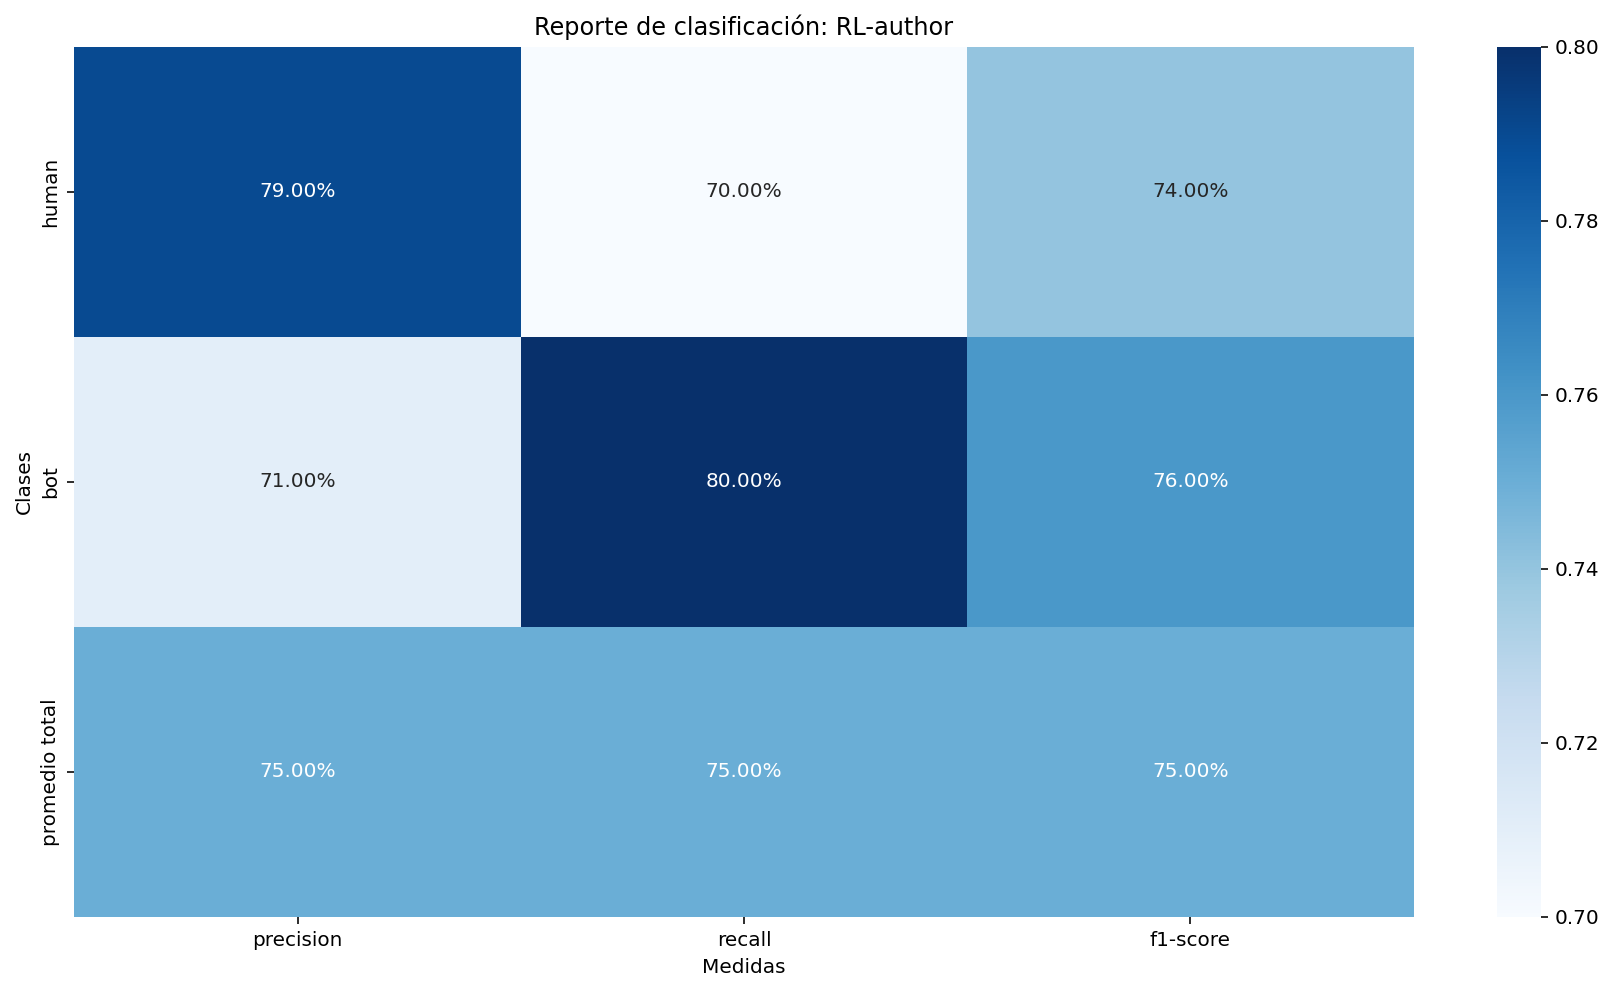

In [14]:
lr_author_plot = p.Plots(metrics= lr_metrics_author)
lr_author_plot.plot_classification_report(title='Reporte de clasificación: RL-author', 
                                        x_label='Medidas', 
                                        y_label='Clases', 
                                        x_labels=['precision', 'recall', 'f1-score'], 
                                        y_labels=['human', 'bot', 'promedio total'], 
                                        with_avg_total=True)

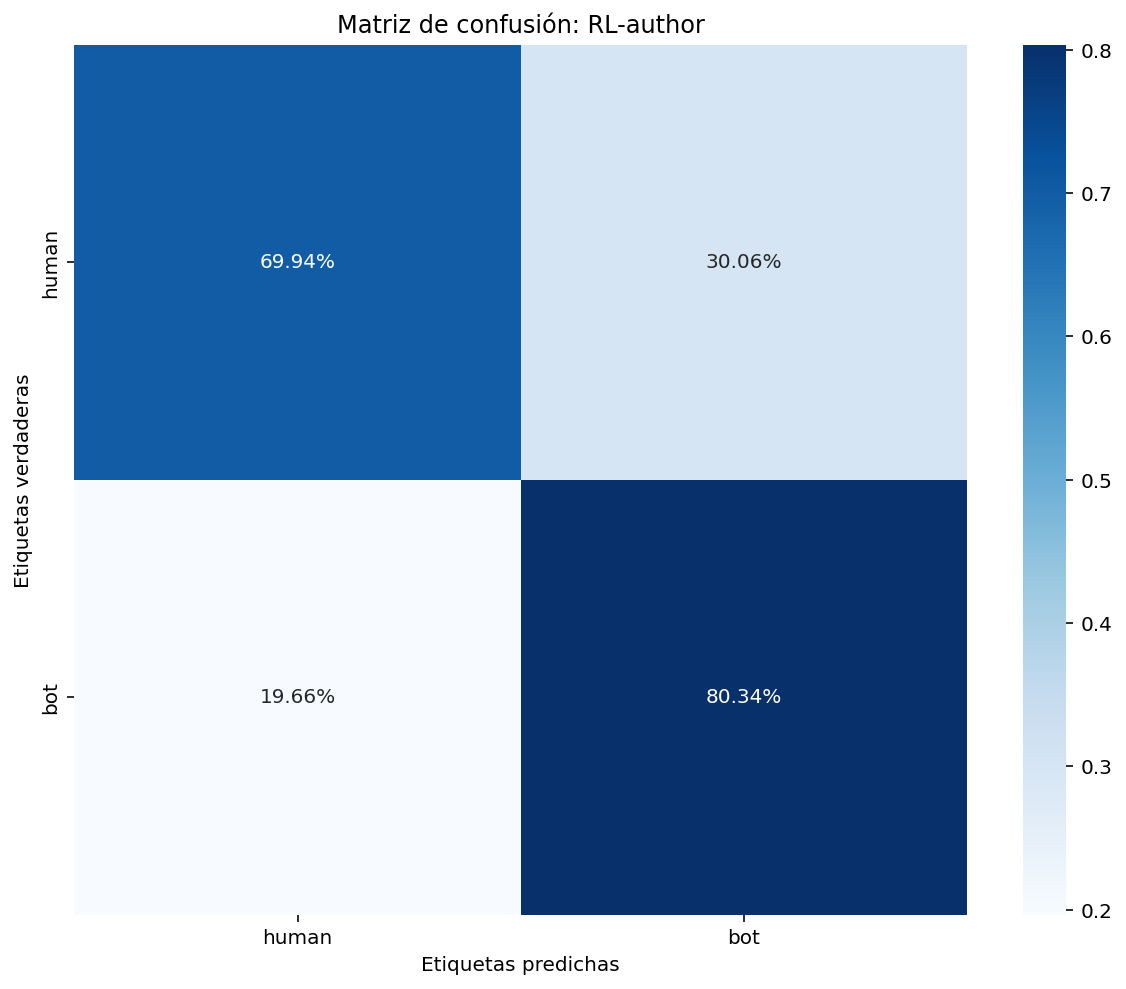

In [15]:
lr_author_plot.plot_confusion_matrix(title='Matriz de confusión: RL-author', 
                                    x_label='Etiquetas predichas', 
                                    y_label='Etiquetas verdaderas', 
                                    labels=target_names)

In [16]:
lr_model_author_en, lr_vectorizer_author_en, lr_metrics_author_en = lr_en_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.86      0.56      0.68      2800
         bot       0.72      0.93      0.81      3452

    accuracy                           0.76      6252
   macro avg       0.79      0.74      0.74      6252
weighted avg       0.78      0.76      0.75      6252



In [17]:
lr_model_author_es, lr_vectorizer_author_es, lr_metrics_author_es = lr_es_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.79      0.71      0.75     32437
         bot       0.71      0.79      0.75     29600

    accuracy                           0.75     62037
   macro avg       0.75      0.75      0.75     62037
weighted avg       0.75      0.75      0.75     62037



### Gender

In [22]:
data_training_gender_en = data_training_en[data_training_en.author != 'bot']
data_test_gender_en = data_test_en[data_test_en.author != 'bot']

data_training_gender_es = data_training_es[data_training_es.author != 'bot']
data_test_gender_es = data_test_es[data_test_es.author != 'bot']

In [23]:
data_training_gender_en.gender.value_counts()

female    4950
male      4900
Name: gender, dtype: int64

In [26]:
# English and Spanish
lr_gender = b.Baseline(model=lr, 
                train_data=train_data, 
                test_data=test_data, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=['gender_1', 'gender_2', 'bot'])

# English
lr_en_gender = b.Baseline(model=lr, 
                train_data=data_training_gender_en, 
                test_data=data_test_gender_en, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

# Spanish
lr_es_gender = b.Baseline(model=lr, 
                train_data=data_training_gender_es, 
                test_data=data_test_gender_es, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

In [27]:
lr_model_gender, lr_vectorizer_gender, lr_metrics_gender = lr_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.71      0.82      0.76     35237
    gender_2       0.46      0.36      0.40     16452
         bot       0.41      0.37      0.39     16600

    accuracy                           0.60     68289
   macro avg       0.53      0.51      0.52     68289
weighted avg       0.58      0.60      0.58     68289



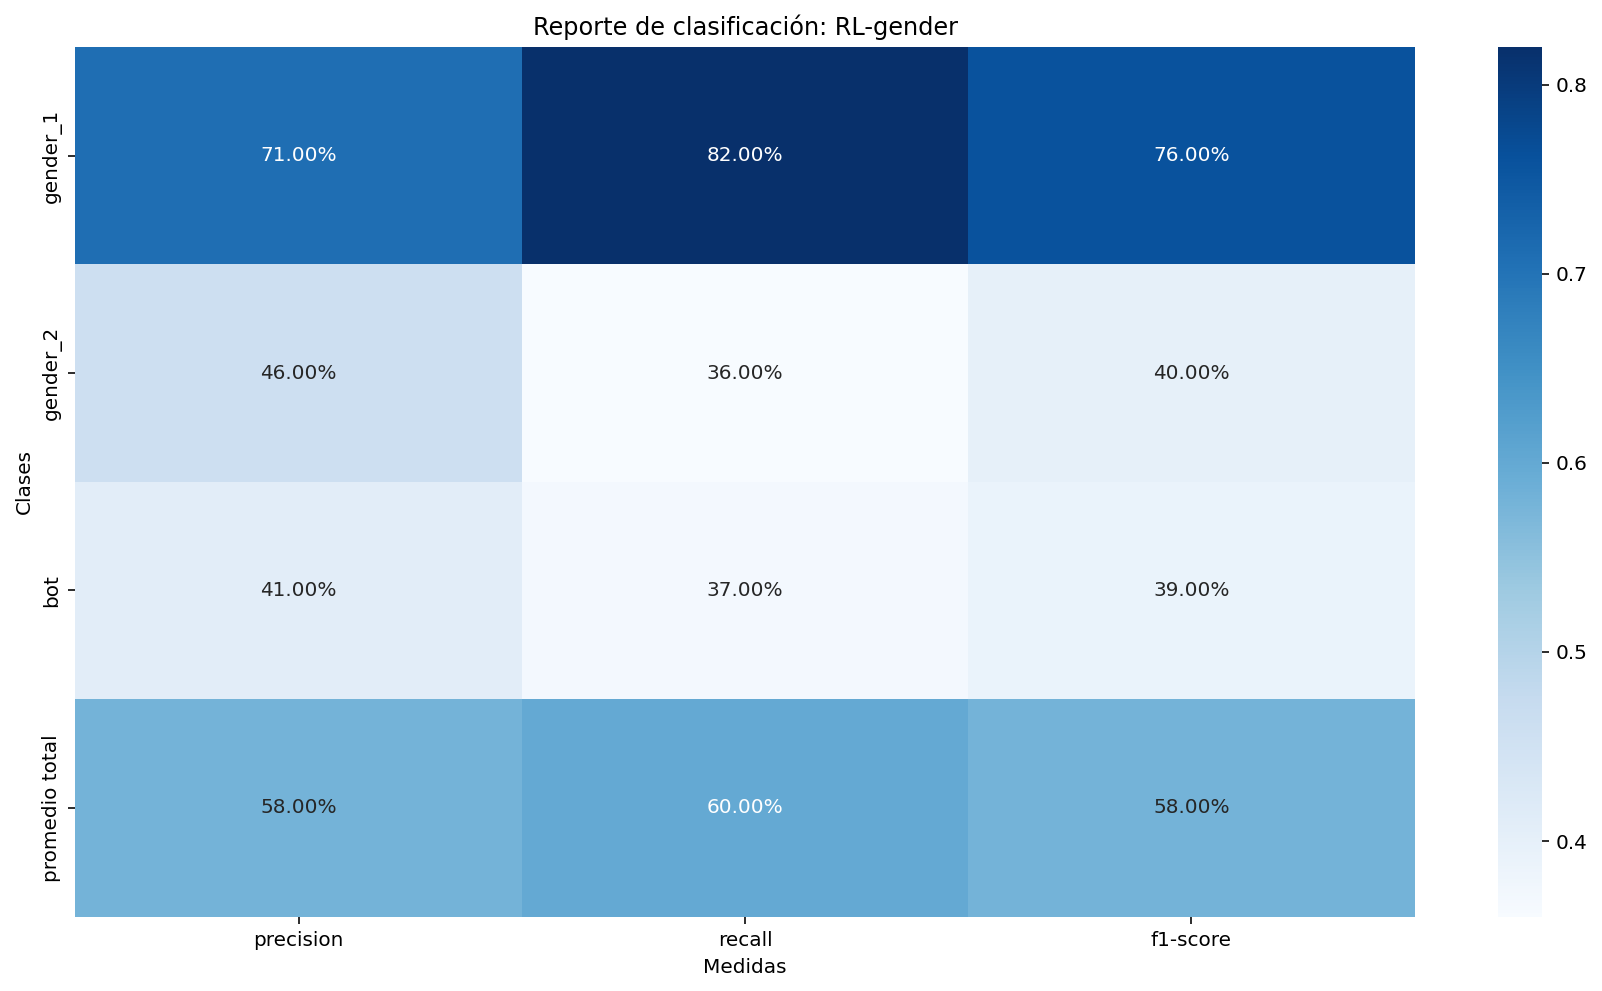

In [28]:
lr_gender_plot = p.Plots(metrics= lr_metrics_gender)
lr_gender_plot.plot_classification_report(title='Reporte de clasificación: RL-gender', 
                                        x_label='Medidas', 
                                        y_label='Clases', 
                                        x_labels=['precision', 'recall', 'f1-score'], 
                                        y_labels=['gender_1', 'gender_2', 'bot', 'promedio total'], 
                                        with_avg_total=True)

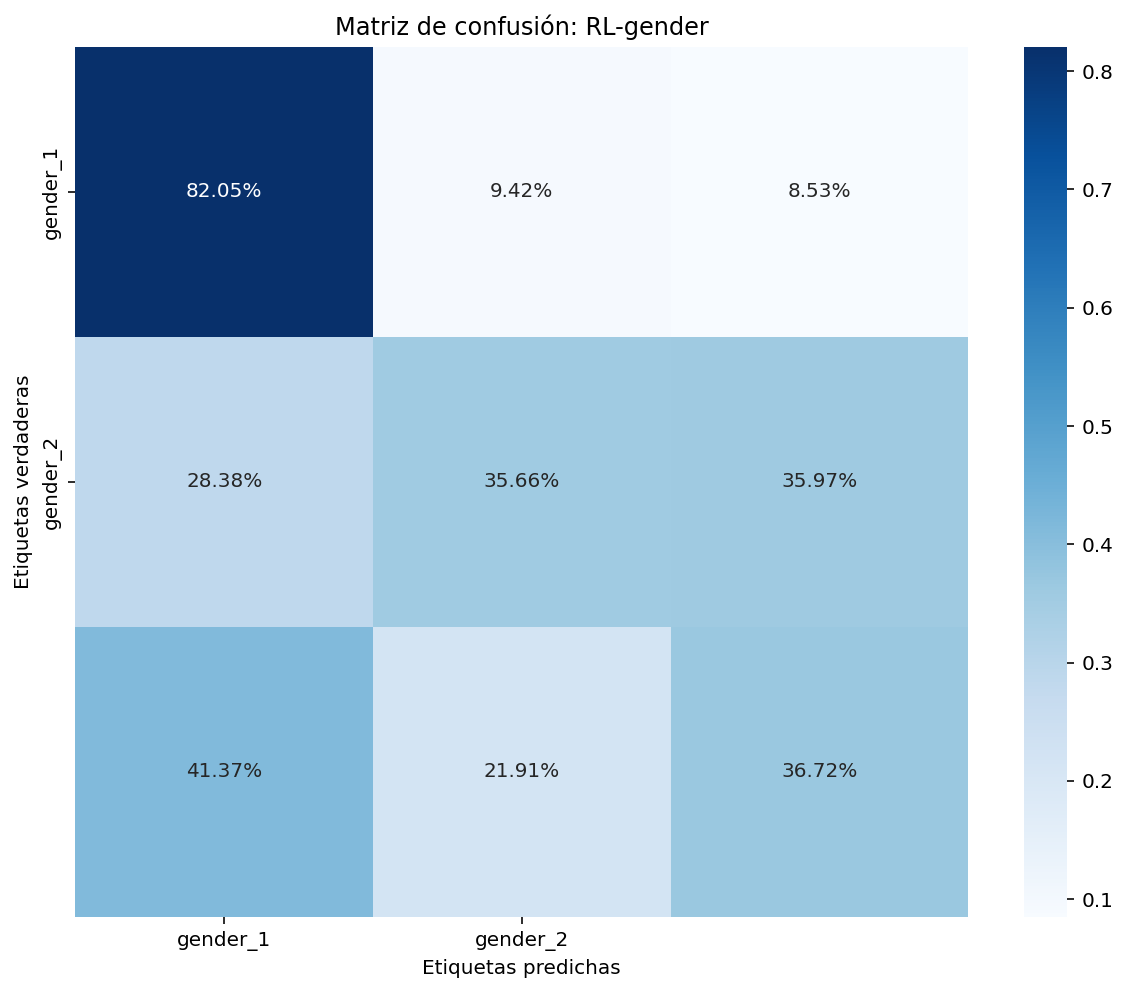

In [29]:
lr_gender_plot.plot_confusion_matrix(title='Matriz de confusión: RL-gender', 
                                    x_label='Etiquetas predichas', 
                                    y_label='Etiquetas verdaderas', 
                                    labels=gender_names)

In [30]:
lr_model_gender_en, lr_vectorizer_gender_en, lr_metrics_gender_en = lr_en_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.74      0.52      0.61      2452
    gender_2       0.32      0.55      0.40      1000

    accuracy                           0.53      3452
   macro avg       0.53      0.53      0.51      3452
weighted avg       0.62      0.53      0.55      3452



In [31]:
lr_model_gender_es, lr_vectorizer_gender_es, lr_metrics_gender_es = lr_es_gender.baseline()


Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.56      0.45      0.50     14000
    gender_2       0.58      0.68      0.63     15600

    accuracy                           0.57     29600
   macro avg       0.57      0.57      0.56     29600
weighted avg       0.57      0.57      0.57     29600



## SVC

In [32]:
lsvc = SVC(kernel='linear', random_state = seed)

### Author

In [33]:
# English and Spanish
lsvc_author = b.Baseline(model=lsvc, 
                train_data=train_data, 
                test_data=test_data, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

# English
lsvc_en_author = b.Baseline(model=lsvc, 
                train_data=data_training_en, 
                test_data=data_test_en, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

# Spanish
lsvc_es_author = b.Baseline(model=lsvc, 
                train_data=data_training_es, 
                test_data=data_test_es, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

In [34]:
lsvc_model_author, lsvc_vectorizer_author, lsvc_metrics_author = lsvc_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.79      0.64      0.71     35237
         bot       0.68      0.82      0.74     33052

    accuracy                           0.73     68289
   macro avg       0.74      0.73      0.73     68289
weighted avg       0.74      0.73      0.73     68289



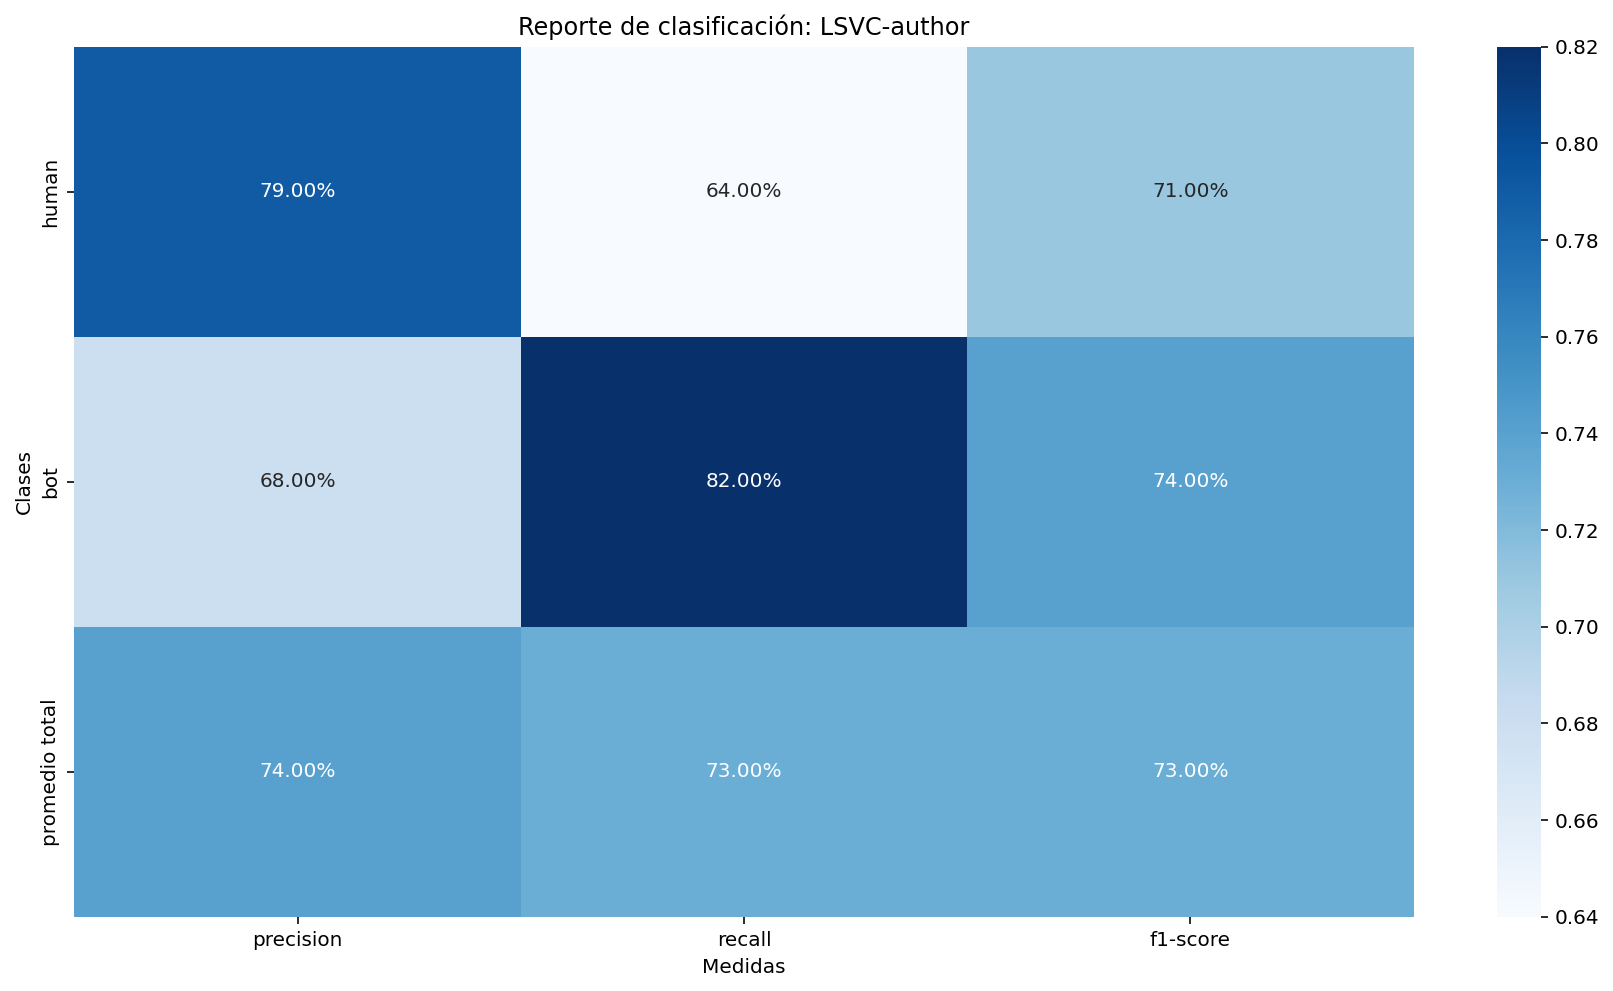

In [35]:
lsvc_author_plot = p.Plots(metrics= lsvc_metrics_author)
lsvc_author_plot.plot_classification_report(title='Reporte de clasificación: LSVC-author', 
                                        x_label='Medidas', 
                                        y_label='Clases', 
                                        x_labels=['precision', 'recall', 'f1-score'], 
                                        y_labels=['human', 'bot', 'promedio total'], 
                                        with_avg_total=True)

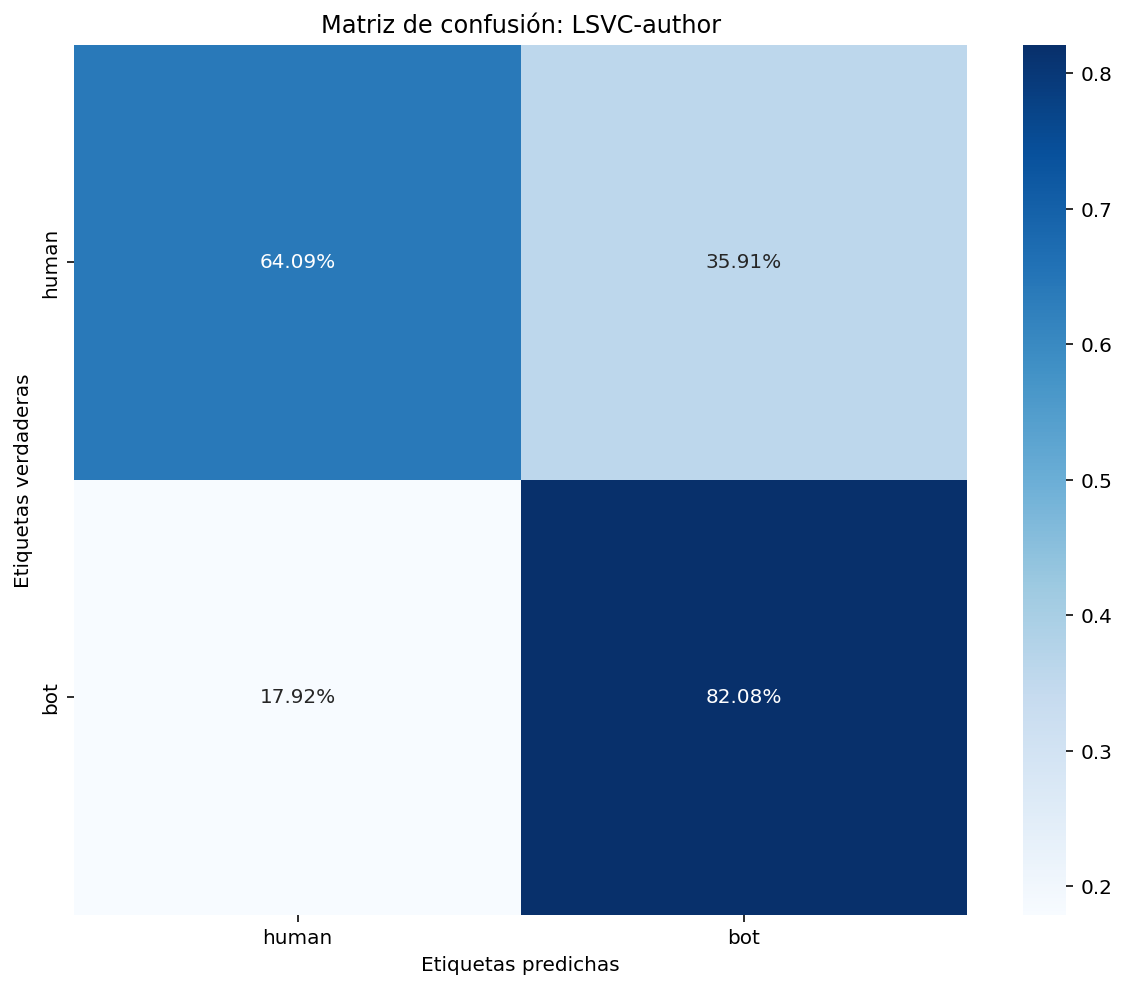

In [36]:
lsvc_author_plot.plot_confusion_matrix(title='Matriz de confusión: LSVC-author', 
                                    x_label='Etiquetas predichas', 
                                    y_label='Etiquetas verdaderas', 
                                    labels=target_names)

In [37]:
lsvc_model_author_en, lsvc_vectorizer_author_en, lsvc_metrics_author_en = lsvc_en_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.84      0.59      0.69      2800
         bot       0.73      0.91      0.81      3452

    accuracy                           0.77      6252
   macro avg       0.79      0.75      0.75      6252
weighted avg       0.78      0.77      0.76      6252



In [38]:
lsvc_model_author_es, lsvc_vectorizer_author_es, lsvc_metrics_author_es = lsvc_es_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.79      0.64      0.71     32437
         bot       0.67      0.82      0.74     29600

    accuracy                           0.72     62037
   macro avg       0.73      0.73      0.72     62037
weighted avg       0.74      0.72      0.72     62037



### Gender

In [39]:
# English and Spanish
lsvc_gender = b.Baseline(model=lsvc, 
                train_data=train_data, 
                test_data=test_data, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=['gender_1', 'gender_2', 'bot'])

# English
lsvc_en_gender = b.Baseline(model=lsvc, 
                train_data=data_training_gender_en, 
                test_data=data_test_gender_en, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

# Spanish
lsvc_es_gender = b.Baseline(model=lsvc, 
                train_data=data_training_gender_es, 
                test_data=data_test_gender_es, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

In [40]:
lsvc_model_gender, lsvc_vectorizer_gender, lsvc_metrics_gender = lsvc_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.75      0.75      0.75     35237
    gender_2       0.43      0.38      0.41     16452
         bot       0.39      0.43      0.41     16600

    accuracy                           0.58     68289
   macro avg       0.52      0.52      0.52     68289
weighted avg       0.59      0.58      0.58     68289



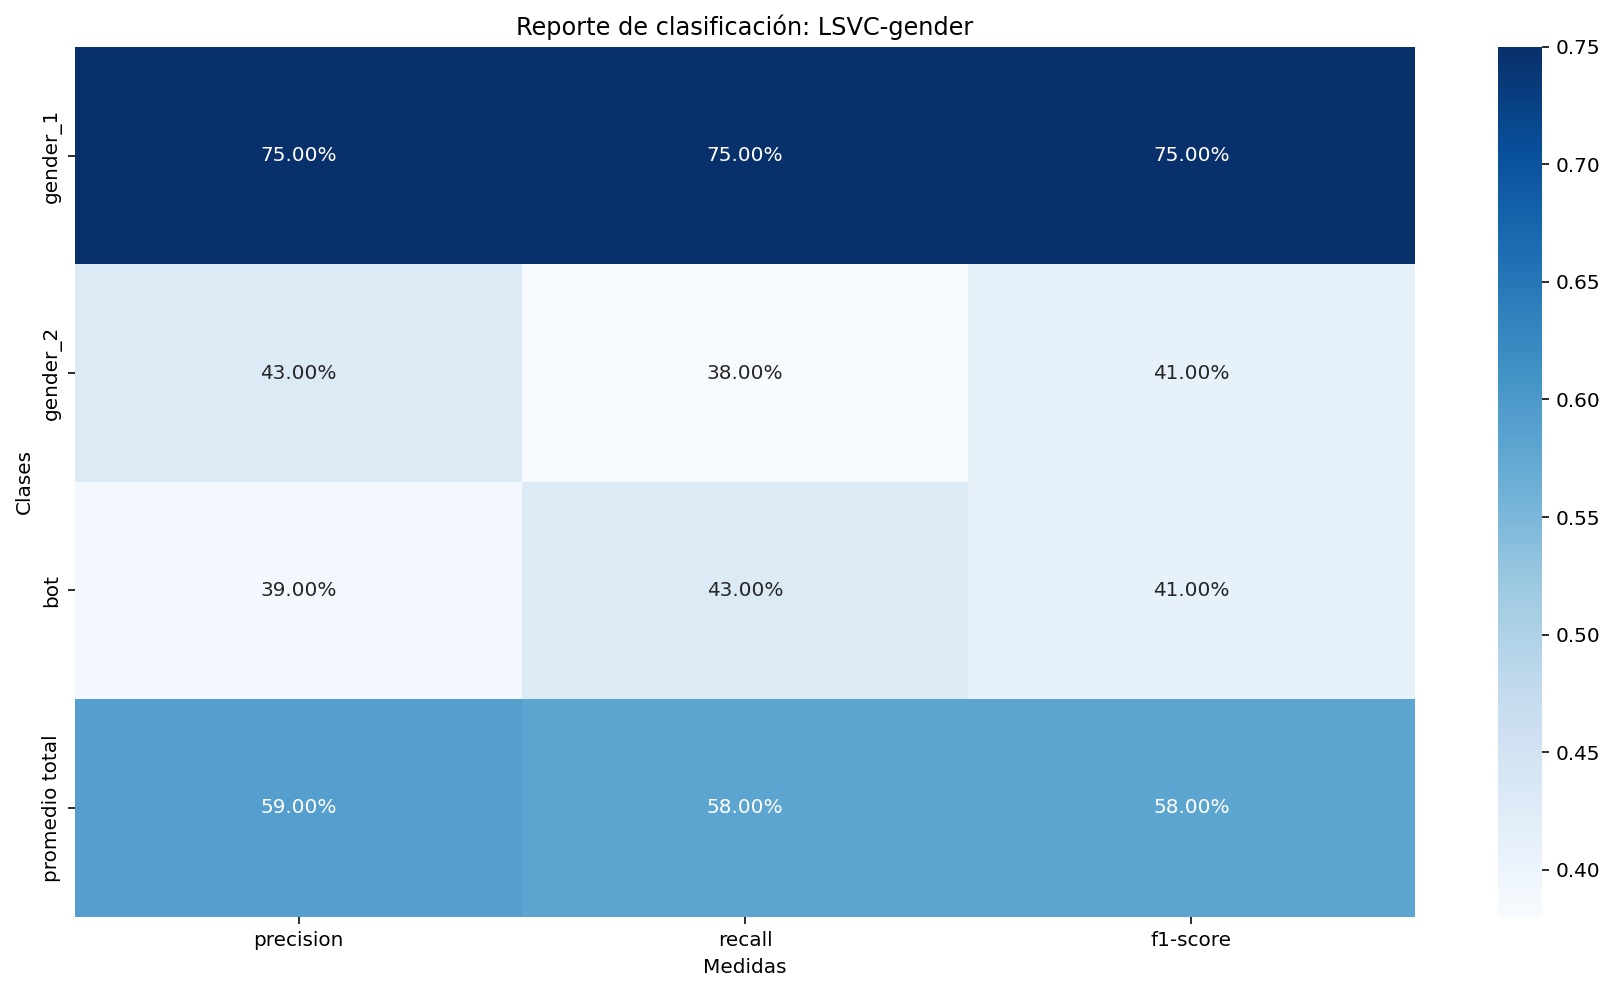

In [41]:
lsvc_gender_plot = p.Plots(metrics=lsvc_metrics_gender)
lsvc_gender_plot.plot_classification_report(title='Reporte de clasificación: LSVC-gender', 
                                        x_label='Medidas', 
                                        y_label='Clases', 
                                        x_labels=['precision', 'recall', 'f1-score'], 
                                        y_labels=['gender_1', 'gender_2', 'bot', 'promedio total'], 
                                        with_avg_total=True)

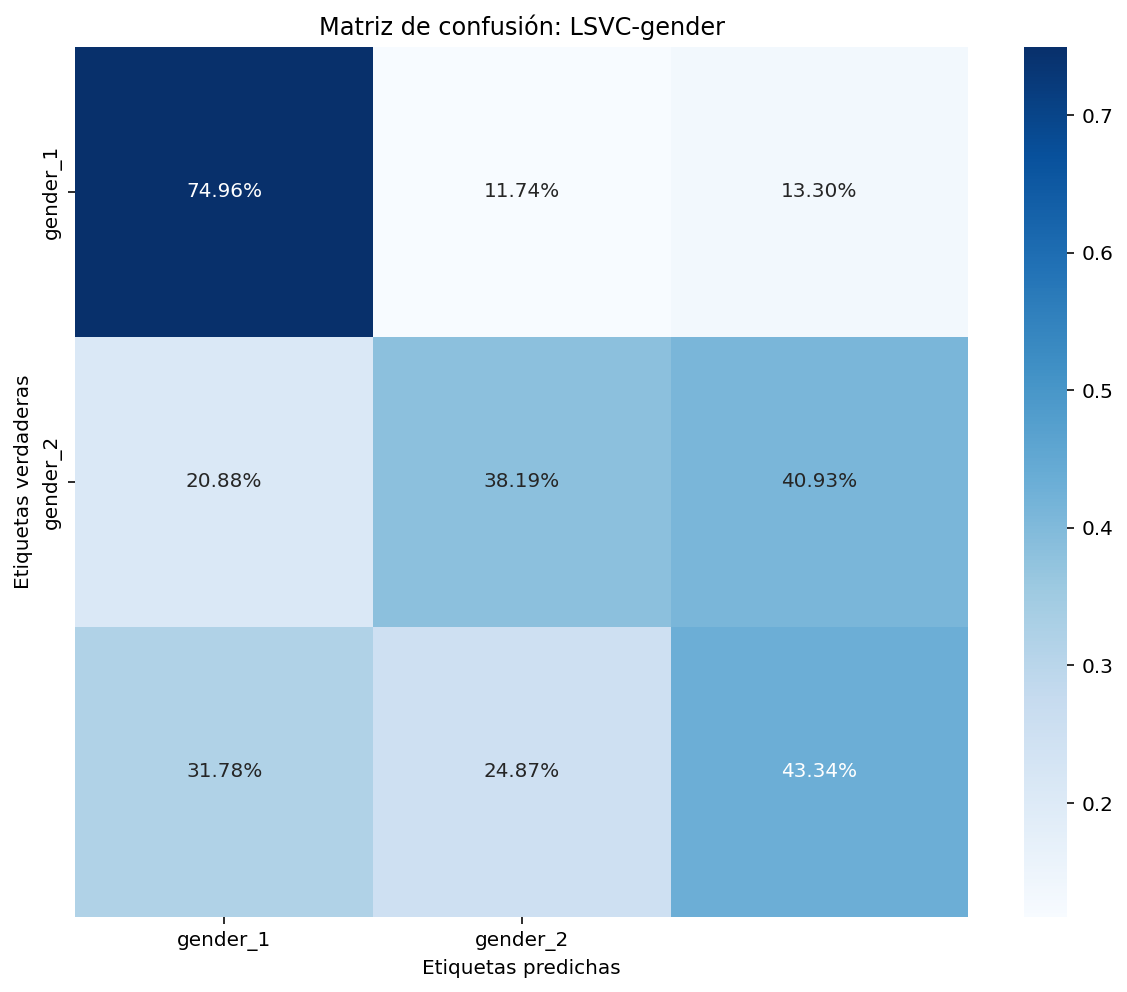

In [42]:
lsvc_gender_plot.plot_confusion_matrix(title='Matriz de confusión: LSVC-gender', 
                                    x_label='Etiquetas predichas', 
                                    y_label='Etiquetas verdaderas', 
                                    labels=gender_names)

In [43]:
lsvc_model_gender_en, lsvc_vectorizer_gender_en, lsvc_metrics_gender_en = lsvc_en_gender.baseline()


Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.74      0.52      0.61      2452
    gender_2       0.32      0.55      0.41      1000

    accuracy                           0.53      3452
   macro avg       0.53      0.54      0.51      3452
weighted avg       0.62      0.53      0.55      3452



In [44]:
lsvc_model_gender_es, lsvc_vectorizer_gender_es, lsvc_metrics_gender_es = lsvc_es_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.54      0.46      0.50     14000
    gender_2       0.57      0.65      0.61     15600

    accuracy                           0.56     29600
   macro avg       0.56      0.56      0.55     29600
weighted avg       0.56      0.56      0.56     29600



## Random forest

In [45]:
rf = RandomForestClassifier(max_depth = 100, random_state = seed)

### Author

In [46]:
# English and Spanish
rf_author = b.Baseline(model=rf, 
                train_data=train_data, 
                test_data=test_data, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

# English
rf_en_author = b.Baseline(model=rf, 
                train_data=data_training_en, 
                test_data=data_test_en, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

# Spanish
rf_es_author = b.Baseline(model=rf, 
                train_data=data_training_es, 
                test_data=data_test_es, 
                x_label_column='tweet',
                y_label_column='author',
                target_names=target_names)

In [47]:
rf_model_author, rf_vectorizer_author, rf_metrics_author = rf_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.82      0.52      0.63     35237
         bot       0.63      0.88      0.73     33052

    accuracy                           0.69     68289
   macro avg       0.72      0.70      0.68     68289
weighted avg       0.73      0.69      0.68     68289



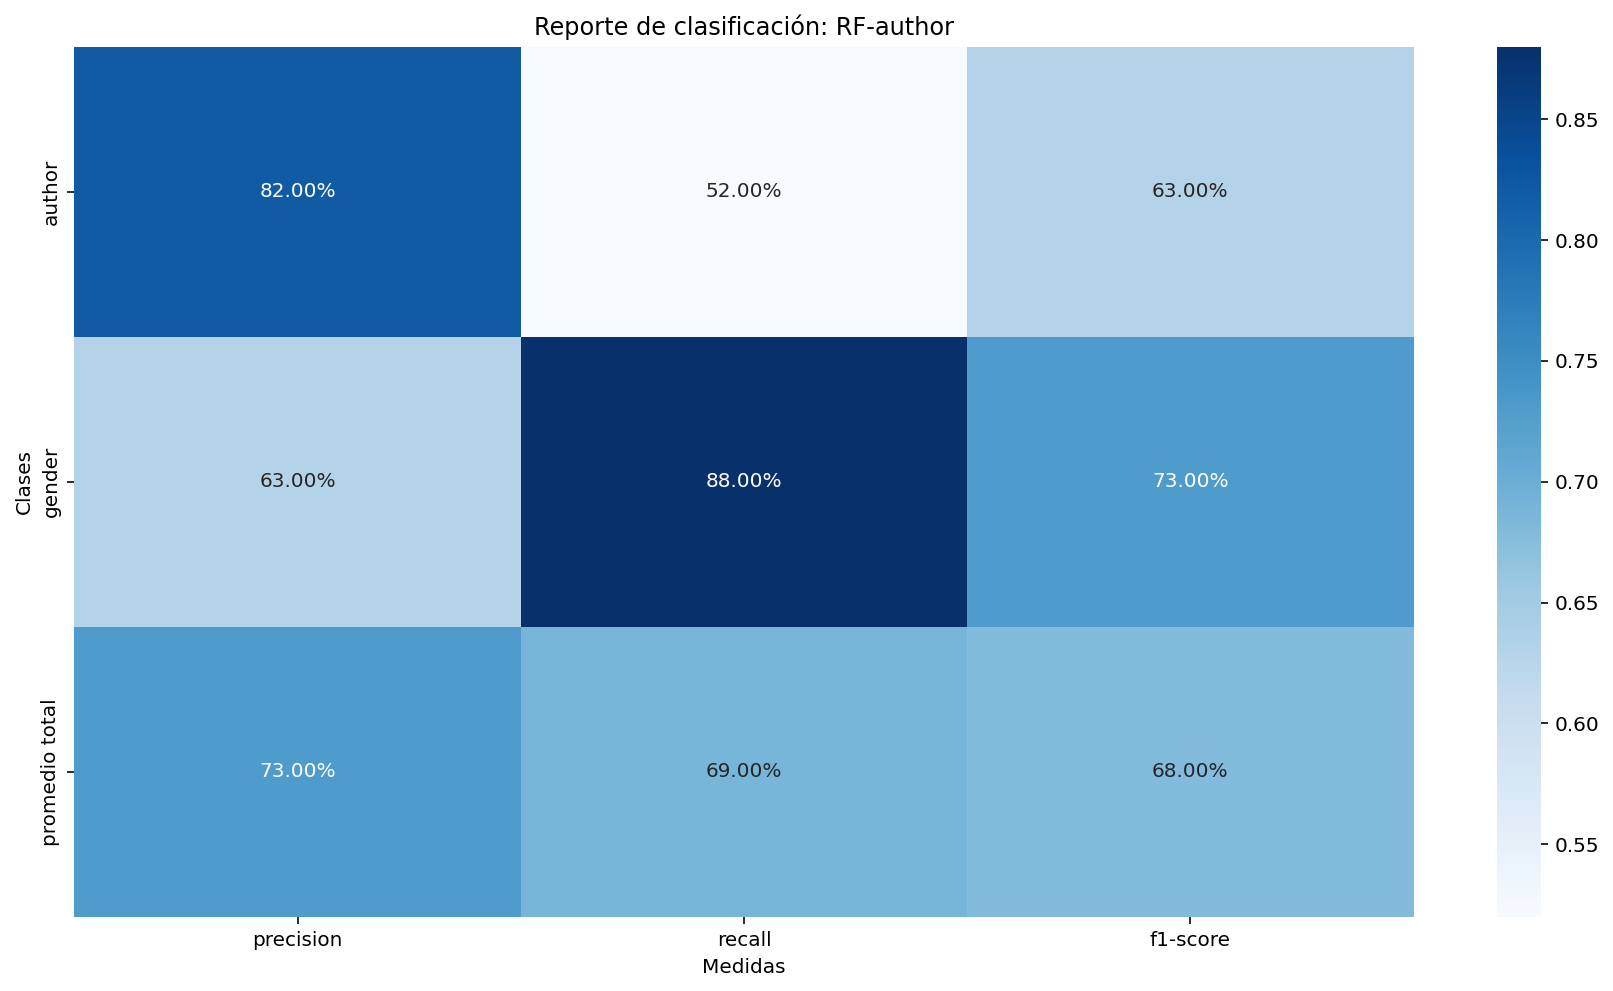

In [48]:
rf_author_plot = p.Plots(metrics=rf_metrics_author)
rf_author_plot.plot_classification_report(title='Reporte de clasificación: RF-author', 
                                        x_label='Medidas', 
                                        y_label='Clases', 
                                        x_labels=['precision', 'recall', 'f1-score'], 
                                        y_labels=['author', 'gender', 'promedio total'], 
                                        with_avg_total=True)

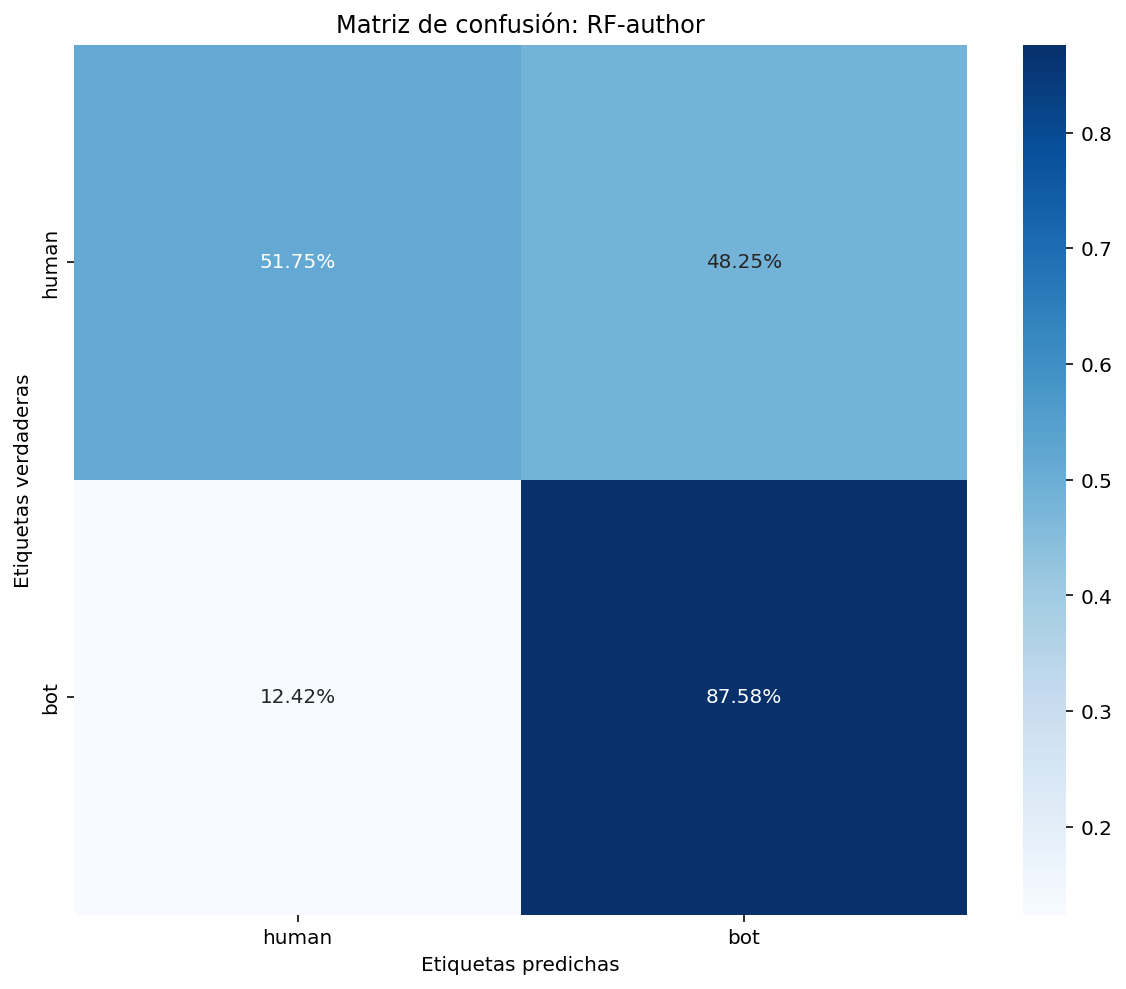

In [49]:
rf_author_plot.plot_confusion_matrix(title='Matriz de confusión: RF-author', 
                                    x_label='Etiquetas predichas', 
                                    y_label='Etiquetas verdaderas', 
                                    labels=target_names)

In [50]:
rf_model_author_en, rf_vectorizer_author_en, rf_metrics_author_en = rf_en_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.89      0.44      0.59      2800
         bot       0.68      0.96      0.79      3452

    accuracy                           0.73      6252
   macro avg       0.78      0.70      0.69      6252
weighted avg       0.77      0.73      0.70      6252



In [51]:
rf_model_author_es, rf_vectorizer_author_es, rf_metrics_author_es = rf_es_author.baseline()

Fitting author model
              precision    recall  f1-score   support

       human       0.82      0.49      0.61     32437
         bot       0.61      0.88      0.72     29600

    accuracy                           0.68     62037
   macro avg       0.71      0.69      0.67     62037
weighted avg       0.72      0.68      0.67     62037



### Gender

In [52]:
# English and Spanish
rf_gender = b.Baseline(model=rf, 
                train_data=train_data, 
                test_data=test_data, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=['gender_1', 'gender_2', 'bot'])

# English
rf_en_gender = b.Baseline(model=rf, 
                train_data=data_training_gender_en, 
                test_data=data_test_gender_en, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

# Spanish
rf_es_gender = b.Baseline(model=rf, 
                train_data=data_training_gender_es, 
                test_data=data_test_gender_es, 
                x_label_column='tweet',
                y_label_column='gender',
                target_names=gender_names)

In [53]:
rf_model_gender, rf_vectorizer_gender, rf_metrics_gender = rf_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.55      0.95      0.70     35237
    gender_2       0.47      0.15      0.23     16452
         bot       0.42      0.07      0.11     16600

    accuracy                           0.54     68289
   macro avg       0.48      0.39      0.35     68289
weighted avg       0.50      0.54      0.44     68289



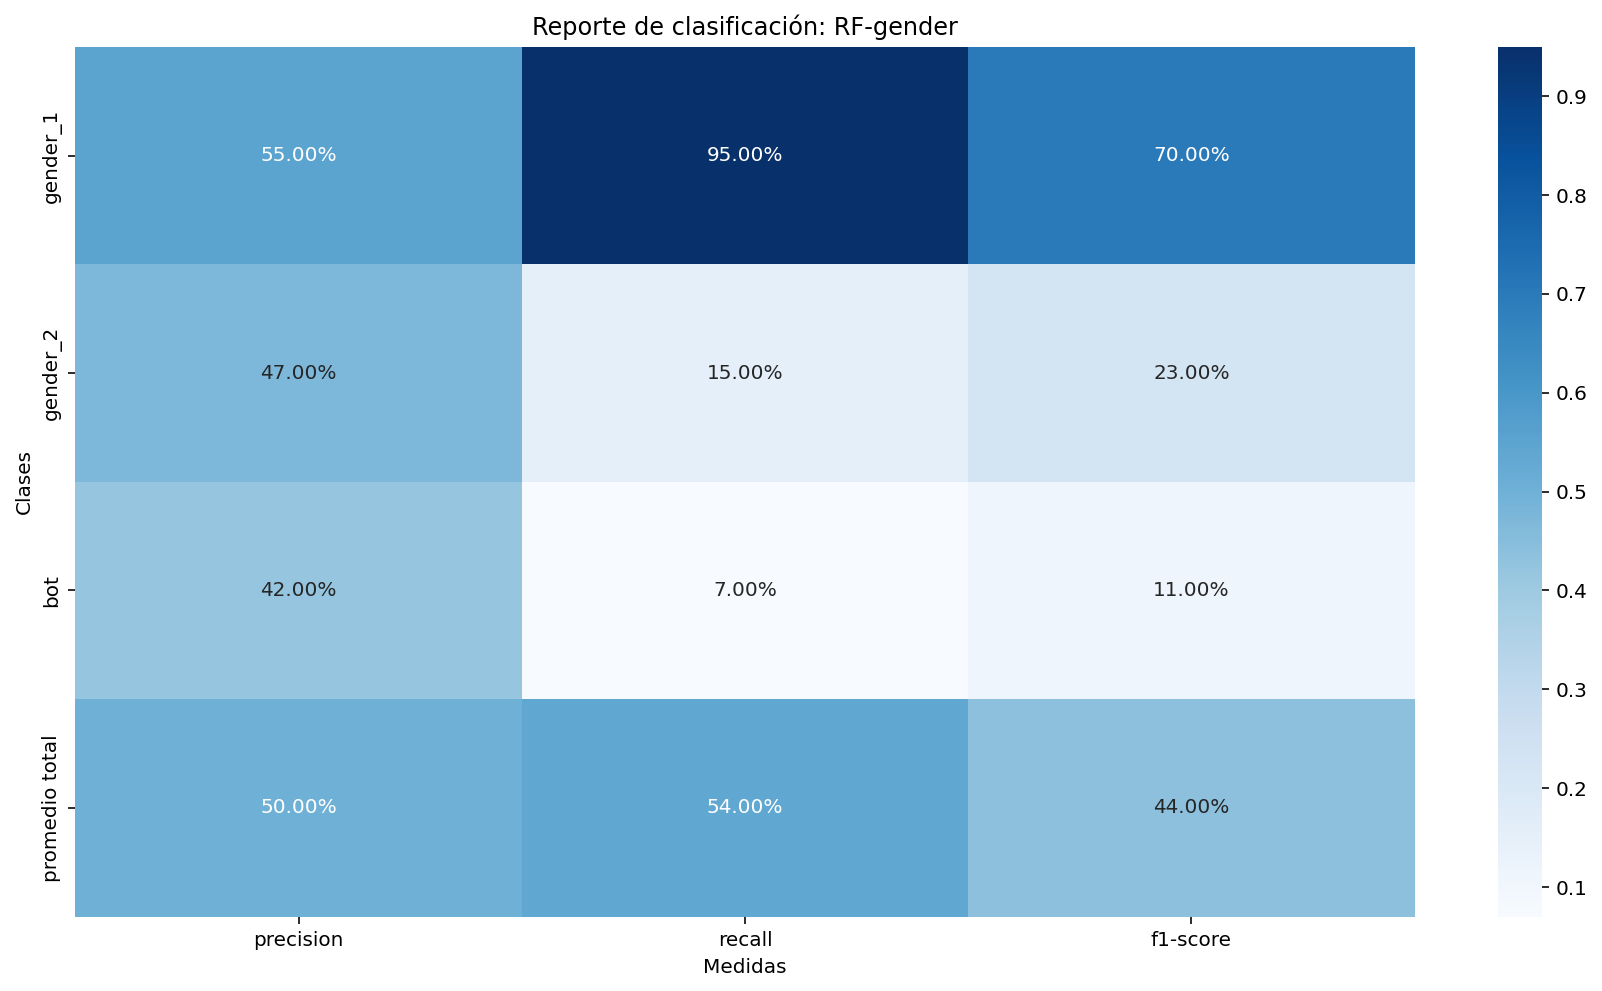

In [54]:
rf_gender_plot = p.Plots(metrics=rf_metrics_gender)
rf_gender_plot.plot_classification_report(title='Reporte de clasificación: RF-gender', 
                                        x_label='Medidas', 
                                        y_label='Clases', 
                                        x_labels=['precision', 'recall', 'f1-score'], 
                                        y_labels=['gender_1', 'gender_2', 'bot', 'promedio total'], 
                                        with_avg_total=True)

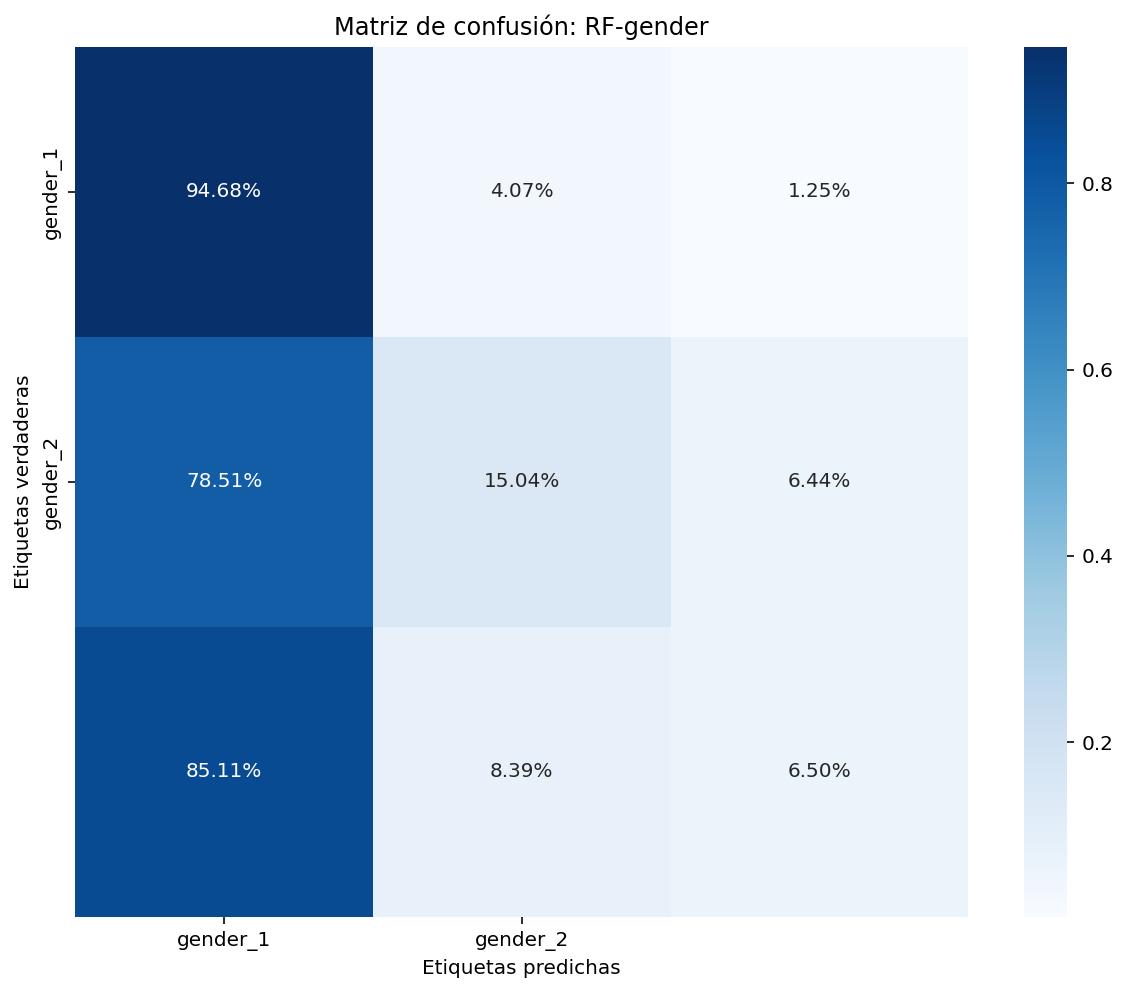

In [55]:
rf_gender_plot.plot_confusion_matrix(title='Matriz de confusión: RF-gender', 
                                    x_label='Etiquetas predichas', 
                                    y_label='Etiquetas verdaderas', 
                                    labels=gender_names)

In [56]:
rf_model_gender_en, rf_vectorizer_gender_en, rf_metrics_gender_en = rf_en_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.72      0.47      0.57      2452
    gender_2       0.30      0.56      0.39      1000

    accuracy                           0.50      3452
   macro avg       0.51      0.52      0.48      3452
weighted avg       0.60      0.50      0.52      3452



In [57]:
rf_model_gender_es, rf_vectorizer_gender_es, rf_metrics_gender_es = rf_es_gender.baseline()

Fitting gender model
              precision    recall  f1-score   support

    gender_1       0.58      0.36      0.44     14000
    gender_2       0.57      0.77      0.66     15600

    accuracy                           0.58     29600
   macro avg       0.58      0.56      0.55     29600
weighted avg       0.58      0.58      0.56     29600

